In [50]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

import os  
path = os.getcwd() + '/data/ex2data1.txt'  
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])  
data.head()  

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


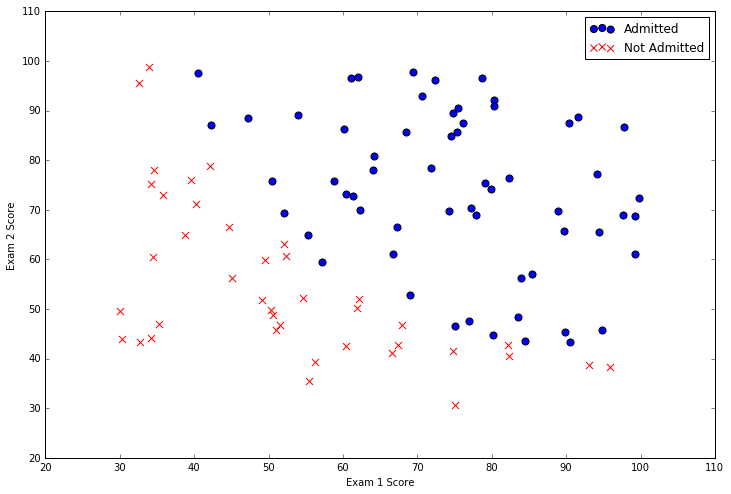

In [51]:
positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  

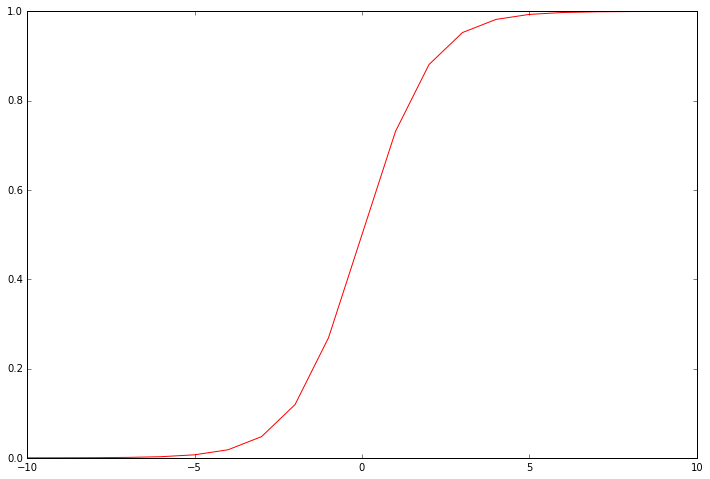

In [52]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [53]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first-second) / (len(X))


In [54]:
#add column for ones
data.insert(0, 'Ones', 1)

# set X to training data and y to target
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

#convert numpy arrays and initialize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3) # ones, test1, test2

X.shape, theta.shape, y.shape


((100, 3), (3,), (100, 1))

In [55]:
cost(theta, X, y)

0.69314718055994529

In [56]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i]= np.sum(term) / len(X)
    
    return grad


In [57]:
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
cost(result[0], X, y)  


0.20349770158947472

In [58]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x>= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a ==1 and b==1) or (a == 0 and b ==0)) else 0 for (a,b) in zip(predictions,y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


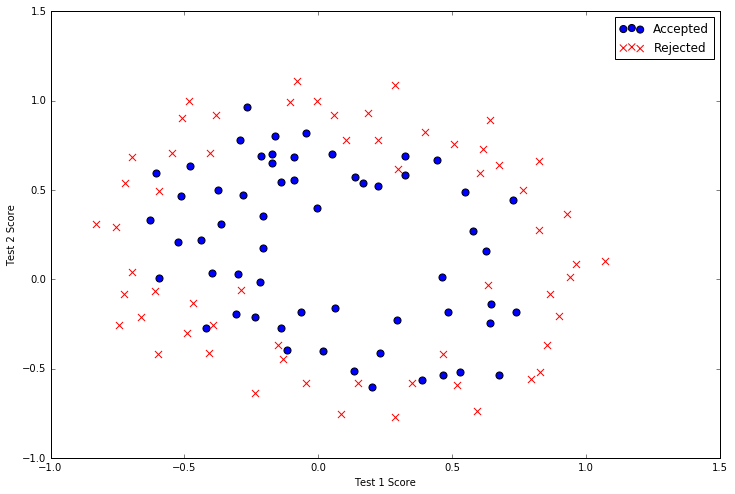

In [59]:
path = os.getcwd() + '/data/ex2data2.txt'  
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])

positive = data2[data2['Accepted'].isin([1])]  
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [60]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

# add the 1's columns
data2.insert(3, 'Ones', 1)

# add powers and multiple of power up to the 5th degree
for i in range(1, degree):
    for j in range(0,i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace = True)
data2.drop('Test 2', axis=1, inplace = True)

data2

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,1.347453e-04,0.001839,0.025089,6.907989e-06,9.426244e-05,0.001286,1.755144e-02
1,1,1,-0.092742,0.008601,-0.063523,-7.976812e-04,0.005891,-0.043509,7.397855e-05,-5.463638e-04,0.004035,-2.980122e-02
2,1,1,-0.213710,0.045672,-0.147941,-9.760555e-03,0.031616,-0.102412,2.085928e-03,-6.756745e-03,0.021886,-7.089469e-02
3,1,1,-0.375000,0.140625,-0.188321,-5.273438e-02,0.070620,-0.094573,1.977539e-02,-2.648268e-02,0.035465,-4.749364e-02
4,1,1,-0.513250,0.263426,-0.238990,-1.352032e-01,0.122661,-0.111283,6.939303e-02,-6.295600e-02,0.057116,-5.181790e-02
5,1,1,-0.524770,0.275384,-0.110097,-1.445130e-01,0.057775,-0.023098,7.583610e-02,-3.031883e-02,0.012121,-4.846023e-03
6,1,1,-0.398040,0.158436,-0.013675,-6.306380e-02,0.005443,-0.000470,2.510192e-02,-2.166683e-03,0.000187,-1.614256e-05
7,1,1,-0.305880,0.093563,0.058805,-2.861892e-02,-0.017987,-0.011305,8.753955e-03,5.501987e-03,0.003458,2.173452e-03
8,1,1,0.016705,0.000279,-0.006753,4.661648e-06,-0.000113,0.002730,7.787282e-08,-1.884424e-06,0.000046,-1.103480e-03
9,1,1,0.131910,0.017400,-0.067787,2.295267e-03,-0.008942,0.034835,3.027686e-04,-1.179515e-03,0.004595,-1.790145e-02


In [62]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    # original cost function terms
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply(1 - y, np.log(1-sigmoid(X * theta.T)))
    
    #regulizer
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    # add regulizer on to original terms
    return np.sum(first - second) / (len(X)) + reg


In [66]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if(i==0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    return grad